# Imports

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.manifold import MDS

# Load data

In [34]:
# File paths of X
# Tuesdays
train_1_paths_x = ['../../data/Train_X/2023_03_14_data.pq',
              '../../data/Train_X/2023_03_21_data.pq',
              '../../data/Train_X/2023_03_28_data.pq',
              '../../data/Train_X/2023_04_04_data.pq',
              '../../data/Train_X/2023_04_11_data.pq']

# Wednesdays
train_2_paths_x = ['../../data/Train_X/2023_03_15_data.pq',
              '../../data/Train_X/2023_03_22_data.pq',
              '../../data/Train_X/2023_03_29_data.pq',
              '../../data/Train_X/2023_04_05_data.pq',
              '../../data/Train_X/2023_04_12_data.pq']

# Thursdays
eval_3_paths_x = ['../../data/Eval_X/2023_03_16_data.pq',
              '../../data/Eval_X/2023_03_23_data.pq',
              '../../data/Eval_X/2023_03_30_data.pq',
              '../../data/Eval_X/2023_04_06_data.pq',
              '../../data/Eval_X/2023_04_13_data.pq']
# Fridays
# unkown


# File paths of y
# Tuesdays
train_1_paths_y = ['../../data/Train_Y/2023_03_14_target.pq',
                '../../data/Train_Y/2023_03_21_target.pq',
                '../../data/Train_Y/2023_03_28_target.pq',
                '../../data/Train_Y/2023_04_04_target.pq',
                '../../data/Train_Y/2023_04_11_target.pq']

# Wednesdays
train_2_paths_y = ['../../data/Train_Y/2023_03_15_target.pq',
                '../../data/Train_Y/2023_03_22_target.pq',
                '../../data/Train_Y/2023_03_29_target.pq',
                '../../data/Train_Y/2023_04_05_target.pq',
                '../../data/Train_Y/2023_04_12_target.pq']

# Thursdays
eval_3_paths_y = ['../../data/Eval_Y/2023_03_16_target.pq',
                '../../data/Eval_Y/2023_03_23_target.pq',
                '../../data/Eval_Y/2023_03_30_target.pq',
                '../../data/Eval_Y/2023_04_06_target.pq',
                '../../data/Eval_Y/2023_04_13_target.pq']
# Fridays
# unkown

In [35]:
# Load data into all day1, day2, day3 dataframes

train_1_dfs_x = [] # tuesday
train_2_dfs_x = [] # wednesday
eval_3_dfs_x = [] # thursday
# test_4_x is unkown / day 4 / friday

train_1_dfs_y = [] # tuesday
train_2_dfs_y = [] # wednesday
eval_3_dfs_y = [] # thursday
# test_4_y is unkown / day 4 / friday

for path in train_1_paths_x:
    train_1_dfs_x.append(pd.read_parquet(path, engine='pyarrow'))
for path in train_2_paths_x:
    train_2_dfs_x.append(pd.read_parquet(path, engine='pyarrow'))
for path in eval_3_paths_x:
    eval_3_dfs_x.append(pd.read_parquet(path, engine='pyarrow'))

for path in train_1_paths_y:
    train_1_dfs_y.append(pd.read_parquet(path, engine='pyarrow'))
for path in train_2_paths_y:
    train_2_dfs_y.append(pd.read_parquet(path, engine='pyarrow'))
for path in eval_3_paths_y:
    eval_3_dfs_y.append(pd.read_parquet(path, engine='pyarrow'))

# Tuesdays, Wednesdays and Thursday dataframes (X and y)
train_1_x = pd.concat(train_1_dfs_x, axis=0)
train_2_x = pd.concat(train_2_dfs_x, axis=0)
eval_3_x = pd.concat(eval_3_dfs_x, axis=0)

train_1_y = pd.concat(train_1_dfs_y, axis=0)
train_2_y = pd.concat(train_2_dfs_y, axis=0)
eval_3_y = pd.concat(eval_3_dfs_y, axis=0)

# Creation of Custom Holdout Split
# test: eval_3_x -> eval_3_y
X1 = pd.concat([train_1_x, train_2_x], axis=0)
y1 = pd.concat([train_1_y, train_2_y], axis=0)
# test: train_1_x -> train_1_y
X2 = pd.concat([train_2_x, eval_3_x], axis=0)
y2 = pd.concat([train_2_y, eval_3_y], axis=0)
# test: train_2_x -> train_2_y
X3 = pd.concat([train_1_x, eval_3_x], axis=0)
y3 = pd.concat([train_1_y, eval_3_y], axis=0)

# First Look into Data

In [36]:
print(f"Shape: {X1.shape}")
print(f"Features: {X1.columns}")
X1.iloc[3000:3005, :].head()

Shape: (684010, 14)
Features: Index(['ProzessData_ActData_AB1_Analogs_DX1_MassPressure',
       'ProzessData_ActData_AB1_Analogs_GY1_MassLevelTank',
       'ProzessData_ActData_AB1_Current_DV1_Scraper',
       'ProzessData_ActData_AB1_Current_DW1_RiserPumpFwd',
       'ProzessData_ActData_AB1_Speed_DV1_Scraper',
       'ProzessData_ActData_AB1_Speed_DW1_RiserPumpFwd',
       'ProzessData_ActData_AB1_Temperature_DP1_MassHeatingStage',
       'ProzessData_ActData_AB1_Temperature_DP1_WaterHeatingStage',
       'ProzessData_ActData_AB1_Temperature_DQ1_MassCoolingStage',
       'ProzessData_ActData_AB1_Temperature_DQ1_WaterCoolingStage',
       'ProzessData_ActData_AB1_Temperature_DR1_WaterMixingStage',
       'ProzessData_ActData_AB1_Temperature_DS1_WaterPipe',
       'ProzessData_ActData_AB1_Temperature_DU1_WaterTank',
       'ProzessData_ActData_AB1_Temperature_DX1_MassInfeed'],
      dtype='object')


,ProzessData_ActData_AB1_Analogs_DX1_MassPressure,ProzessData_ActData_AB1_Analogs_GY1_MassLevelTank,ProzessData_ActData_AB1_Current_DV1_Scraper,ProzessData_ActData_AB1_Current_DW1_RiserPumpFwd,ProzessData_ActData_AB1_Speed_DV1_Scraper,ProzessData_ActData_AB1_Speed_DW1_RiserPumpFwd,ProzessData_ActData_AB1_Temperature_DP1_MassHeatingStage,ProzessData_ActData_AB1_Temperature_DP1_WaterHeatingStage,ProzessData_ActData_AB1_Temperature_DQ1_MassCoolingStage,ProzessData_ActData_AB1_Temperature_DQ1_WaterCoolingStage,ProzessData_ActData_AB1_Temperature_DR1_WaterMixingStage,ProzessData_ActData_AB1_Temperature_DS1_WaterPipe,ProzessData_ActData_AB1_Temperature_DU1_WaterTank,ProzessData_ActData_AB1_Temperature_DX1_MassInfeed
2023-03-14 01:50:00+00:00,0.92,63.340000,0.0,0.0,0.0,0.0,41.299999,42.099998,41.700001,42.0,42.0,41.849998,42.0,41.900002
2023-03-14 01:50:01+00:00,0.93,63.349998,0.0,0.0,0.0,0.0,41.299999,42.000000,41.700001,42.0,42.0,41.849998,42.0,41.900002
2023-03-14 01:50:02+00:00,0.94,63.340000,0.0,0.0,0.0,0.0,41.299999,42.000000,41.700001,42.0,42.0,41.849998,42.0,41.900002
2023-03-14 01:50:03+00:00,0.93,63.349998,0.0,0.0,0.0,0.0,41.299999,42.000000,41.700001,42.0,42.0,41.849998,42.0,41.900002
2023-03-14 01:50:04+00:00,0.92,63.340000,0.0,0.0,0.0,0.0,41.299999,42.000000,41.700001,42.0,42.0,41.849998,42.0,41.900002


In [41]:
# print start-end dates and if any index duplicates
for df in [X1, X2, X3]:
    print(df.index.min())
    print(df.index.max())
    duplicate_indices = df.index.duplicated()
    print(any(duplicate_indices))

2023-03-14 01:00:00+00:00
2023-04-12 20:00:00+00:00
False
2023-03-15 01:00:00+00:00
2023-04-13 20:00:00+00:00
False
2023-03-14 01:00:00+00:00
2023-04-13 20:00:00+00:00
False


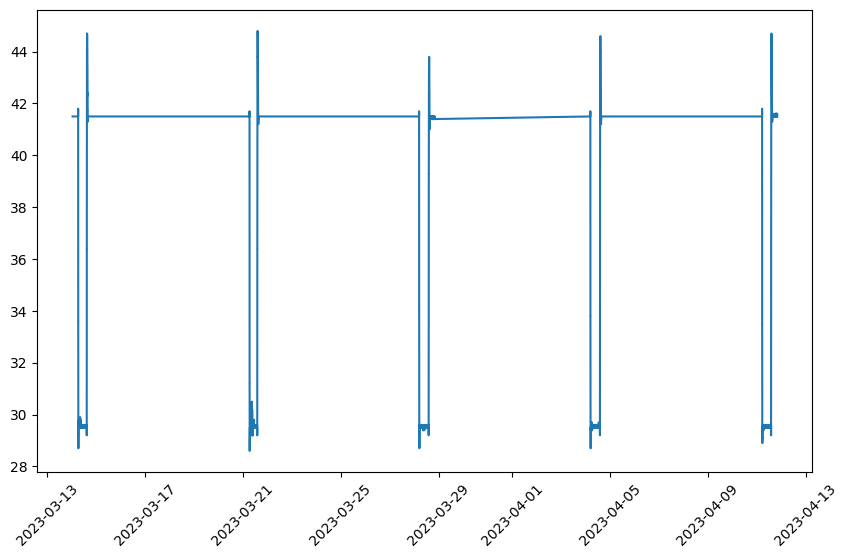

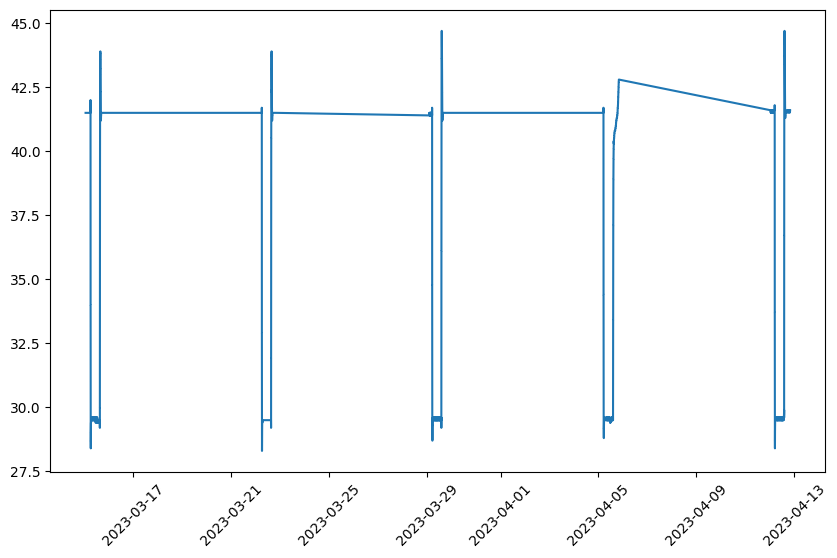

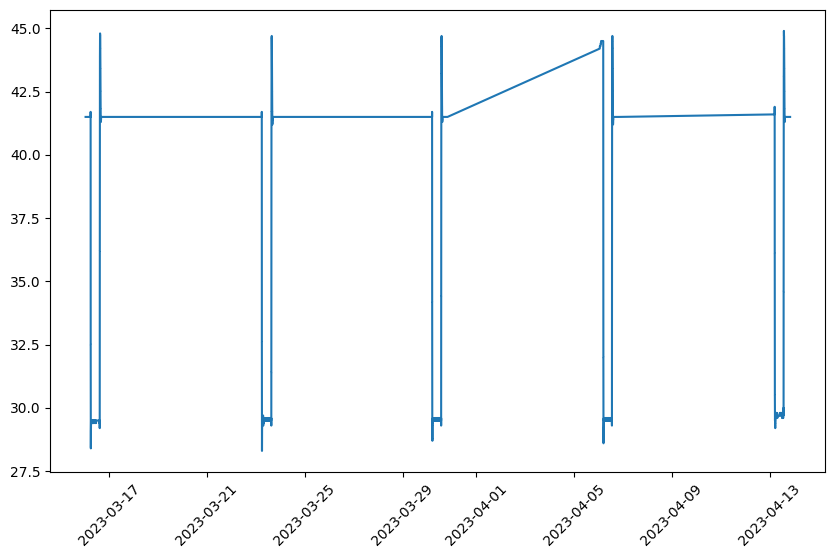

In [53]:
for df in [train_1_y, train_2_y, eval_3_y]:
    plt.figure(figsize=(10, 6))
    plt.plot(df)
    plt.xticks(rotation=45)
    #plt.axvline(datetime.strptime('2023-03-22 00:00', '%Y-%m-%d %H:%M'), color='red', linestyle='--')
    #plt.axvline(datetime.strptime('2023-03-30 00:00', '%Y-%m-%d %H:%M'), color='blue', linestyle='--')
    plt.show()


# Feature Engineering

## Time Features (hour, minute)

In [58]:
test_df = train_1_x.copy()
print(test_df.shape)
print(test_df.columns)
test_df.head()

(342005, 14)
Index(['ProzessData_ActData_AB1_Analogs_DX1_MassPressure',
       'ProzessData_ActData_AB1_Analogs_GY1_MassLevelTank',
       'ProzessData_ActData_AB1_Current_DV1_Scraper',
       'ProzessData_ActData_AB1_Current_DW1_RiserPumpFwd',
       'ProzessData_ActData_AB1_Speed_DV1_Scraper',
       'ProzessData_ActData_AB1_Speed_DW1_RiserPumpFwd',
       'ProzessData_ActData_AB1_Temperature_DP1_MassHeatingStage',
       'ProzessData_ActData_AB1_Temperature_DP1_WaterHeatingStage',
       'ProzessData_ActData_AB1_Temperature_DQ1_MassCoolingStage',
       'ProzessData_ActData_AB1_Temperature_DQ1_WaterCoolingStage',
       'ProzessData_ActData_AB1_Temperature_DR1_WaterMixingStage',
       'ProzessData_ActData_AB1_Temperature_DS1_WaterPipe',
       'ProzessData_ActData_AB1_Temperature_DU1_WaterTank',
       'ProzessData_ActData_AB1_Temperature_DX1_MassInfeed'],
      dtype='object')


,ProzessData_ActData_AB1_Analogs_DX1_MassPressure,ProzessData_ActData_AB1_Analogs_GY1_MassLevelTank,ProzessData_ActData_AB1_Current_DV1_Scraper,ProzessData_ActData_AB1_Current_DW1_RiserPumpFwd,ProzessData_ActData_AB1_Speed_DV1_Scraper,ProzessData_ActData_AB1_Speed_DW1_RiserPumpFwd,ProzessData_ActData_AB1_Temperature_DP1_MassHeatingStage,ProzessData_ActData_AB1_Temperature_DP1_WaterHeatingStage,ProzessData_ActData_AB1_Temperature_DQ1_MassCoolingStage,ProzessData_ActData_AB1_Temperature_DQ1_WaterCoolingStage,ProzessData_ActData_AB1_Temperature_DR1_WaterMixingStage,ProzessData_ActData_AB1_Temperature_DS1_WaterPipe,ProzessData_ActData_AB1_Temperature_DU1_WaterTank,ProzessData_ActData_AB1_Temperature_DX1_MassInfeed
2023-03-14 01:00:00+00:00,0.92,63.349998,0.0,0.0,0.0,0.0,41.299999,42.000000,41.700001,42.0,42.0,41.849998,42.099998,41.900002
2023-03-14 01:00:01+00:00,0.93,63.340000,0.0,0.0,0.0,0.0,41.299999,42.000000,41.700001,42.0,42.0,41.849998,42.099998,41.900002
2023-03-14 01:00:02+00:00,0.93,63.340000,0.0,0.0,0.0,0.0,41.299999,42.000000,41.700001,42.0,42.0,41.849998,42.000000,41.900002
2023-03-14 01:00:03+00:00,0.92,63.349998,0.0,0.0,0.0,0.0,41.299999,41.900002,41.700001,42.0,42.0,41.849998,42.000000,41.900002
2023-03-14 01:00:04+00:00,0.92,63.340000,0.0,0.0,0.0,0.0,41.299999,41.900002,41.700001,42.0,42.0,41.849998,42.000000,41.900002


In [61]:
# add features: hour of day, minute of day
def add_time_features(df):
    df['hour'] = df.index.hour
    df['minute'] = df.index.minute
    return df

test_df = add_time_features(test_df)

In [72]:
print(test_df.shape)
print(test_df.columns)
test_df.iloc[29998:30003,-2:]

(342005, 16)
Index(['ProzessData_ActData_AB1_Analogs_DX1_MassPressure',
       'ProzessData_ActData_AB1_Analogs_GY1_MassLevelTank',
       'ProzessData_ActData_AB1_Current_DV1_Scraper',
       'ProzessData_ActData_AB1_Current_DW1_RiserPumpFwd',
       'ProzessData_ActData_AB1_Speed_DV1_Scraper',
       'ProzessData_ActData_AB1_Speed_DW1_RiserPumpFwd',
       'ProzessData_ActData_AB1_Temperature_DP1_MassHeatingStage',
       'ProzessData_ActData_AB1_Temperature_DP1_WaterHeatingStage',
       'ProzessData_ActData_AB1_Temperature_DQ1_MassCoolingStage',
       'ProzessData_ActData_AB1_Temperature_DQ1_WaterCoolingStage',
       'ProzessData_ActData_AB1_Temperature_DR1_WaterMixingStage',
       'ProzessData_ActData_AB1_Temperature_DS1_WaterPipe',
       'ProzessData_ActData_AB1_Temperature_DU1_WaterTank',
       'ProzessData_ActData_AB1_Temperature_DX1_MassInfeed', 'hour', 'minute'],
      dtype='object')


,hour,minute
2023-03-14 09:19:58+00:00,9,19
2023-03-14 09:19:59+00:00,9,19
2023-03-14 09:20:00+00:00,9,20
2023-03-14 09:20:01+00:00,9,20
2023-03-14 09:20:02+00:00,9,20


In [73]:
# apply to all custom splits: X1, X2, X3
X1 = add_time_features(X1)
X2 = add_time_features(X2)
X3 = add_time_features(X3)
X1.iloc[29998:30003,-2:]

,hour,minute
2023-03-14 09:19:58+00:00,9,19
2023-03-14 09:19:59+00:00,9,19
2023-03-14 09:20:00+00:00,9,20
2023-03-14 09:20:01+00:00,9,20
2023-03-14 09:20:02+00:00,9,20


# Look into Data again

### Correlation Matrix

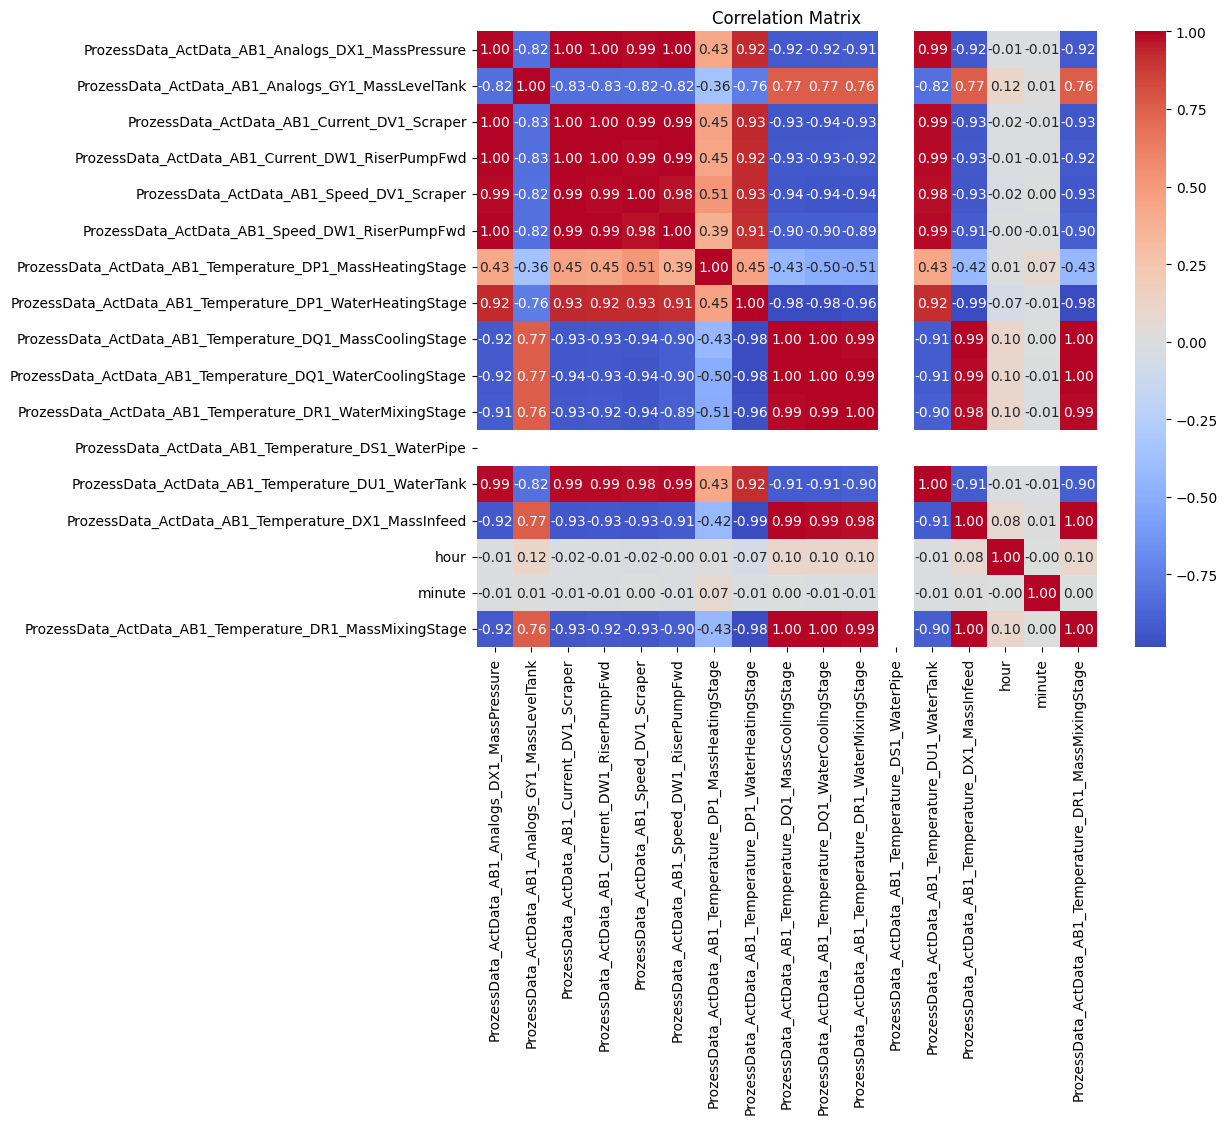

In [76]:
X1_with_y1 = pd.concat([X1, y1], axis=1)
correlation_matrix = X1_with_y1.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### PCA / EVP

In [79]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
pca.fit(X1)

# Calculate non-cumulative PVE
non_cumulative_pve = pca.explained_variance_ratio_

# Calculate cumulative PVE
cumulative_pve = np.cumsum(non_cumulative_pve)


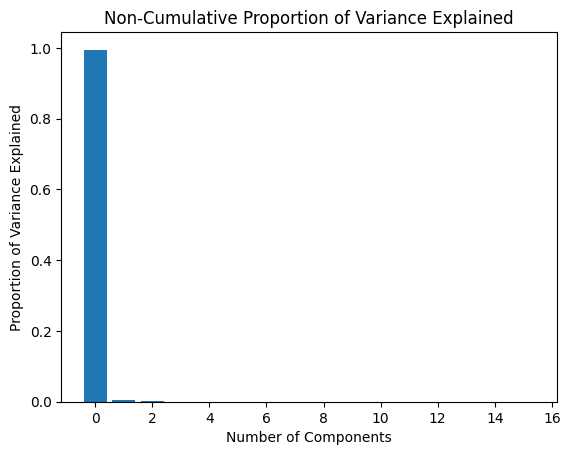

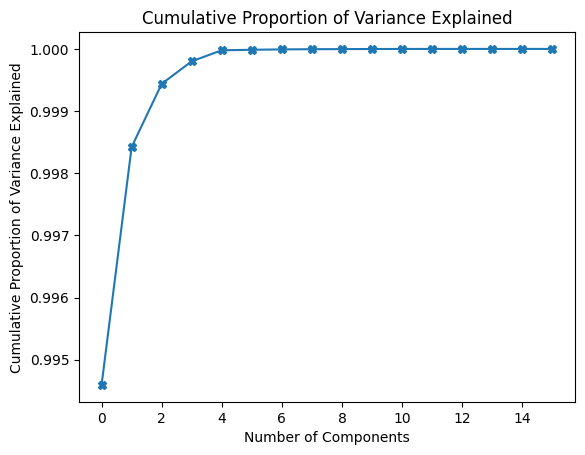

In [82]:
# Plot non-cumulative PVE
plt.bar(range(len(non_cumulative_pve)), non_cumulative_pve)
plt.xlabel('Number of Components')
plt.ylabel('Proportion of Variance Explained')
plt.title('Non-Cumulative Proportion of Variance Explained')
plt.show()

# Plot cumulative PVE
plt.plot(cumulative_pve, marker="X")
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.title('Cumulative Proportion of Variance Explained')
plt.show()

### MDS

In [84]:
# Create MDS object
mds = MDS(n_components=2, dissimilarity='euclidean')

# Perform MDS
X1_with_y1_mds = mds.fit_transform(X1_with_y1)

# Plot MDS results
plt.scatter(X1_with_y1_mds[:, 0], X1_with_y1_mds[:, 1])
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('Metric MDS')
plt.show()

MemoryError: Unable to allocate 3.40 TiB for an array with shape (684010, 684010) and data type float64

# Modelling

## Baseline

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

In [97]:
# Calculate the MSE and RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

# Print some example predictions
example_indices = [0, 1, 2, 3, 4]  # Example indices to print
for i in example_indices:
    print(f"{X_test.index[i]}: | Actual y: {y_test.iloc[i, 0]} | Predicted y: {y_pred[i]}")

MSE: 0.010507321269666683
RMSE: 0.10250522557248817
2023-03-22 15:46:04+00:00: | Actual y: 42.0 | Predicted y: [41.97445781]
2023-03-21 15:53:06+00:00: | Actual y: 41.5 | Predicted y: [41.49825148]
2023-03-14 12:17:10+00:00: | Actual y: 29.600000381469727 | Predicted y: [29.45843337]
2023-03-15 16:36:12+00:00: | Actual y: 41.5 | Predicted y: [41.54789011]
2023-03-22 02:41:08+00:00: | Actual y: 41.5 | Predicted y: [41.52204897]


## XGBoost

In [98]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Convert the data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Make predictions on the testing data
y_pred = model.predict(dtest)

In [99]:
# Calculate the MSE and RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

# Print some example predictions
example_indices = [0, 1, 2, 3, 4]  # Example indices to print
for i in example_indices:
    print(f"{X_test.index[i]}: | Actual y: {y_test.iloc[i, 0]} | Predicted y: {y_pred[i]}")

MSE: 0.03125276789951157
RMSE: 0.17678452392534696
2023-03-22 15:46:04+00:00: | Actual y: 42.0 | Predicted y: 41.63616943359375
2023-03-21 15:53:06+00:00: | Actual y: 41.5 | Predicted y: 41.34490966796875
2023-03-14 12:17:10+00:00: | Actual y: 29.600000381469727 | Predicted y: 29.702049255371094
2023-03-15 16:36:12+00:00: | Actual y: 41.5 | Predicted y: 41.33098220825195
2023-03-22 02:41:08+00:00: | Actual y: 41.5 | Predicted y: 41.34490966796875


In [100]:
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y1, test_size=0.2, random_state=42)

# Convert the data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Make predictions on the testing data
y_pred = model.predict(dtest)

In [101]:
# Calculate the MSE and RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

# Print some example predictions
example_indices = [0, 1, 2, 3, 4]  # Example indices to print
for i in example_indices:
    print(f"{X_test.index[i]}: | Actual y: {y_test.iloc[i, 0]} | Predicted y: {y_pred[i]}")

MSE: 0.1916308900449985
RMSE: 0.43775665619725135


AttributeError: 'numpy.ndarray' object has no attribute 'index'